# Práctica Final - José Manuel Guzmán Gutiérrez
-----------------------------------------------------
## Machine Learning 101
--------------------------------------
Importamos librerías iniciales y hacemos una observación inicial del dataset para comprobar que la carga ha sido óptima


In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("airbnb-listings.csv", sep=';', decimal='.')
data.shape

(14780, 89)

In [3]:
data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,14712301,https://www.airbnb.com/rooms/14712301,20170304065726,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,Located 1 minute away from Earls Court. It is ...,NaN,Located 1 minute away from Earls Court. It is ...,none,NaN,...,9.0,9.0,10.0,NaN,NaN,strict,1.0,0.34,"51.4924740202,-0.188628400994","Host Has Profile Pic,Host Identity Verified"
1,12884849,https://www.airbnb.com/rooms/12884849,20170304065726,2017-03-05,Five bedroom house in Barnes,Lovely and spacious Edwardian house located on...,The house is spacious with approx 225 sq. of l...,Lovely and spacious Edwardian house located on...,none,Quiet residential street,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.76,"51.4820046166,-0.23927746504","Host Has Profile Pic,Is Location Exact"
2,17524980,https://www.airbnb.com/rooms/17524980,20170304065726,2017-03-05,"Modern & Bright, Central Soho, 1 Bedroom Apart...",A nice compact one bedroom apartment that has ...,One Bedroom Apartment - Bedroom (Double Bed 14...,A nice compact one bedroom apartment that has ...,none,"Central Soho. Oxford Street, Berwick Street, C...",...,NaN,NaN,NaN,NaN,NaN,strict,10.0,NaN,"51.5157923128,-0.136332115026","Host Has Profile Pic,Host Identity Verified,In..."
3,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.33,"40.4101060805,-3.71475403418","Host Has Profile Pic,Host Identity Verified,Is..."
4,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,...,10.0,10.0,10.0,NaN,NaN,strict,2.0,2.69,"40.4169688226,-3.70943892111","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,17670749,https://www.airbnb.com/rooms/17670749,20170403112125,2017-04-04,"Cozy apartment for rent - Month AUD 1,935","43% discount for 28 days --> AU 1,935 Apartme...",+ sofa bed,"43% discount for 28 days --> AU 1,935 Apartme...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"-33.8667781109,151.225985332","Host Has Profile Pic,Is Location Exact,Instant..."
14776,16353063,https://www.airbnb.com/rooms/16353063,20170603080828,2017-06-03,"Charming Stone Tudor - King room, walk to subway!","We are offering clean, comfortable furnished r...",Expansive room with a very comfortable king be...,"We are offering clean, comfortable furnished r...",none,Forest Hill is an upscale Toronto neighbourhoo...,...,6.0,6.0,6.0,NaN,NaN,flexible,3.0,0.42,"43.6879444108,-79.4189794224","Host Has Profile Pic,Host Identity Verified,Is..."
14777,10354583,https://www.airbnb.com/rooms/10354583,20170509144220,2017-05-09,Beautiful and airy apartment with a view.,The apartment has been professionally decorate...,"Light, Air, subdued elegance.",The apartment has been professionally decorate...,none,Cannaregio is one of the five sestrieri and it...,...,10.0,10.0,10.0,NaN,NaN,strict_new,1.0,3.01,"45.4412550432,12.3376705007","Host Is Superhost,Host Has Profile Pic"
14778,16760648,https://www.airbnb.com/rooms/16760648,20170404145355,2017-04-05,South Pigalle le TOP !,Mon logement est proche de Hôtel Amour. Vous a...,si vous aimez l'alliance de l'ancien et de l'a...,Mon logement est proche de Hôtel Amour. Vous 

Dividimos el dataset en train y test

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('train.csv', sep=';', decimal='.', index=False)
test.to_csv('test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [5]:
df.shape

(11824, 89)

In [6]:
pd.set_option('max_columns', None)
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,17235126,https://www.airbnb.com/rooms/17235126,20170407214119,2017-04-08,Habitación muy tranquila en el Centro de Madrid,"Muy cerca de El Rastro, La Latina, Lavapiés, L...",NaN,"Muy cerca de El Rastro, La Latina, Lavapiés, L...",none,NaN,NaN,NaN,Mi casa es una casa muy agradable y compartire...,Estaré encantada de ayudarte en la información...,"El orden es importante para estar en armonía, ...",https://a0.muscache.com/im/pictures/0a4d9829-9...,https://a0.muscache.com/im/pictures/0a4d9829-9...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/0a4d9829-9...,116088603,https://www.airbnb.com/users/show/116088603,María,2017-02-12,ES,NaN,within a day,100.0,NaN,https://a0.muscache.com/im/pictures/7aa63ff3-0...,https://a0.muscache.com/im/pictures/7aa63ff3-0...,Acacias,1.0,1.0,"email,phone","Acacias, Madrid, Comunidad de Madrid 28012, Spain",Acacias,Acacias,Arganzuela,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.401267,-3.700029,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,First aid kit,Fire e...",NaN,32.0,NaN,NaN,NaN,NaN,1,6,2,1125,today,NaN,24,54,84,84,2017-04-08,1,2017-02-22,2017-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,0.65,"40.4012668023,-3.70002857964","Host Has Profile Pic,Is Location Exact,Require..."
1,14257720,https://www.airbnb.com/rooms/14257720,20170407214119,2017-04-08,Incredible Duplex with Your own Patio in Lavapiés,You will love staying in this stunning Duplex ...,You can enjoy this amazing fully equipped two ...,You will love staying in this stunning Duplex ...,none,This is one of the coolest neighborhoods in Ma...,NaN,It is really good communicated if you want to ...,The property counts with a huge terrace on top...,I will be available 24/7 in case you need anyt...,Enjoy it as if it were your house! We welcom...,https://a0.muscache.com/im/pictures/9611d6cc-4...,https://a0.muscache.com/im/pictures/9611d6cc-4...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/9611d6cc-4...,12030420,https://www.airbnb.com/users/show/12030420,Ignacio MyCityHome,2014-02-07,"Madrid, Community of Madrid, Spain",INSEAD MBA and Strategy consultant Sports pass...,within an hour,100.0,NaN,https://a0.muscache.com/im/users/12030420/prof...,https://a0.muscache.com/im/users/12030420/prof...,Goya,39.0,39.0,"email,phone,facebook,google,reviews,jumio,work...","Embajadores, Madrid, Comunidad de Madrid 28012...",Embajadores,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.407382,-3.701838,Apartment,Entire home/apt,6,1.0,1.0,2.0,Real Bed,"TV,Air conditioning,Kitchen,Buzzer/wireless in...",NaN,80.0,NaN,NaN,100.0,30.0,4,30,2,1125,2 days ago,N

In [7]:
df = df.drop(['ID','Listing Url','Scrape ID','Last Scraped','Name','Summary','Space','Description','Experiences Offered','Neighborhood Overview','Transit','Access','Thumbnail Url','Medium Url','House Rules','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Since','Host Location','Host About','Host Response Time','Host Thumbnail Url','Host Picture Url','Host Verifications','Street','Neighbourhood','Neighbourhood Group Cleansed','State','Zipcode','Country Code','Country','Weekly Price','Monthly Price','Maximum Nights','Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90','Availability 365','First Review','Last Review','License','Jurisdiction Names'],axis=1)
df

,Notes,Interaction,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Neighbourhood Cleansed,City,Market,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Calendar last Scraped,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,NaN,Estaré encantada de ayudarte en la información...,100.0,NaN,Acacias,1.0,1.0,Acacias,Madrid,Madrid,"Madrid, Spain",40.401267,-3.700029,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,First aid kit,Fire e...",NaN,32.0,NaN,NaN,1,6,2,2017-04-08,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,0.65,"40.4012668023,-3.70002857964","Host Has Profile Pic,Is Location Exact,Require..."
1,NaN,I will be available 24/7 in case you need anyt...,100.0,NaN,Goya,39.0,39.0,Embajadores,Madrid,Madrid,"Madrid, Spain",40.407382,-3.701838,Apartment,Entire home/apt,6,1.0,1.0,2.0,Real Bed,"TV,Air conditioning,Kitchen,Buzzer/wireless in...",NaN,80.0,100.0,30.0,4,30,2,2017-04-07,15,96.0,10.0,10.0,10.0,10.0,9.0,9.0,moderate,18.0,2.27,"40.4073822303,-3.70183800443","Host Has Profile Pic,Host Identity Verified,Is..."
2,NaN,Estamos dispuestos a informarles todo lo neces...,100.0,NaN,NaN,1.0,1.0,San Fermín,Madrid,Madrid,"Madrid, Spain",40.367149,-3.688130,Apartment,Entire home/apt,6,2.0,4.0,5.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator...",NaN,75.0,150.0,20.0,1,0,3,2017-04-08,19,95.0,10.0,10.0,10.0,10.0,8.0,9.0,flexible,1.0,1.33,"40.3671492349,-3.6881304574","Host Has Profile Pic,Host Identity Verified,Re..."
3,NaN,NaN,100.0,NaN,NaN,2.0,2.0,Puerta del Angel,Madrid,Madrid,"Madrid, Spain",40.413557,-3.725190,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",NaN,35.0,NaN,NaN,1,0,2,2017-04-08,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2.0,0.61,"40.4135572963,-3.72519017228","Host Has Profile Pic,Requires License,Instant ..."
4,El apartamento está a tan solo unos minutos ca...,We meet the arrival day in order to give them ...,100.0,NaN,Malasaña,3.0,3.0,Goya,Madrid,Madrid,"Madrid, Spain",40.426057,-3.668762,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,80.0,250.0,NaN,2,5,5,2017-04-08,16,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,3.0,0.87,"40.4260565879,-3.66876169338","Host Has Profile Pic,Is Location Exact,Require..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,En la casa vivo yo y una perrita Border Collie...,Cuando ellos lo requieran.,100.0,NaN,Ciudad Lineal,2.0,2.0,Costillares,Madrid,Madrid,"Madrid, Spain",40.474583,-3.665453,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"translation missing: en.hosting_amenity_49,tra...",NaN,21.0,NaN,NaN,1,0,2,2017-04-08,11,95.0,10.0,9.0,10.0,10.0,9.0,10.0,flexible,2.0,0.69,"40.474582629,-3.66545298681","Host Has Profile Pic,Host Identity Verified,Is..."
11820,Si estáis interesados en disfrutar de una sesi...,Yo misma os atenderé cuando lleguéis y os expl...,90.0,NaN,NaN,1.0,1.0,Palacio,Madrid,Madrid,"Madrid, Spain",40.413727,-3.713509,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Buzzer/wire...",NaN,52.0,150.0,15.0,2,10,1,2017-04-08,25,94.0,10.0,10.0,10.0,10.0,10.0,9.0,strict,1.0,3.97,"40.4137269888,-3.71350915328","Host Is Superhost,Host Has Profile Pic,Host Id..."
11821,"DAMAGE DEPOSIT: On arrival, guests will be ask...",NaN,100.0,NaN,Malasaña,28.0,28.0,Recoletos,Madrid,Madrid,"Madrid, Spain",40.421828,-3.684211,Apartment,Entire home/apt,2,1.5,1.0,1.0,Real Bed,"TV

In [8]:
df.shape

(11824, 42)

In [9]:
df.dtypes

Notes                              object
Interaction                        object
Host Response Rate                float64
Host Acceptance Rate               object
Host Neighbourhood                 object
Host Listings Count               float64
Host Total Listings Count         float64
Neighbourhood Cleansed             object
City                               object
Market                             object
Smart Location                     object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Amenities                          object
Square Feet                       float64
Price                             float64
Security Deposit                  

In [10]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,10295.0,94.881107,15.020291,0.000000,100.000000,100.000000,100.000000,100.000000
Host Listings Count,11822.0,12.541279,34.343150,0.000000,1.000000,2.000000,5.000000,519.000000
Host Total Listings Count,11822.0,12.541279,34.343150,0.000000,1.000000,2.000000,5.000000,519.000000
Latitude,11824.0,40.496569,4.659362,-37.851182,40.409775,40.419533,40.430939,55.966912
Longitude,11824.0,-3.866641,14.199179,-123.124429,-3.707545,-3.700742,-3.684057,153.371427
Accommodates,11824.0,3.284337,2.103071,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11779.0,1.284107,0.662054,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11804.0,1.348865,0.901267,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11782.0,2.049143,1.611134,1.000000,1.000000,2.000000,2.000000,16.000000
Square Feet,475.0,403.640000,666.477207,0.000000,0.000000,108.000000,646.000000,6997.000000


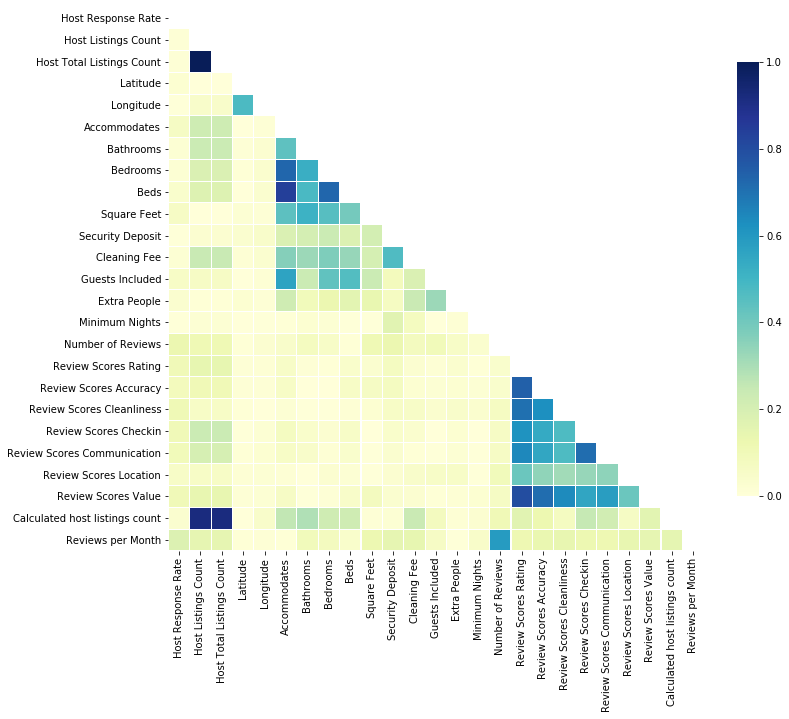

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Eliminamos **_'Calculated host listings count'_** y **_'Calculated host listings count'_** por su alta correlación con **_'Host Listings Count'_**

In [12]:
df = df.drop(['Calculated host listings count','Host Total Listings Count'],axis=1)

**_'Host Response Rate'_** tiene una media muy alta (Mediana en 100), con una desviación típica que sigue situando a la mayoría de valores en un rango muy alto. Entendemos que no enriquece la información del dataset. También eliminamos **_'Latitude'_** y **_'Longitud'_**, así como **_'Geolocalizacion'_**, ya que los consideramos innecesarios al tener la información barrio como variable más coherente (la ubicación exacta no es relevante para el precio).

In [13]:
df = df.drop(['Host Response Rate','Latitude','Longitude','Geolocation'],axis=1)

**_Beds_** y **_Accomodates_** tienen una correlación alta: eliminamos **_Beds_** para no confundir con **_Bedrooms_**

In [14]:
df = df.drop(['Beds'],axis=1)

No solo se da el caso de que todos los **_Review Score_** están basados en datos cualitativos, sino que además están altamente correlados con el **_Reviews Scores Rating_**, así que dejamos esta última por representar un índice general de opinión. 

In [15]:
df = df.drop(['Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value'],axis=1)

In [16]:
df.shape

(11824, 29)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Listings Count,11822.0,12.541279,34.343150,0.00,1.00,2.0,5.0000,519.00
Accommodates,11824.0,3.284337,2.103071,1.00,2.00,3.0,4.0000,16.00
Bathrooms,11779.0,1.284107,0.662054,0.00,1.00,1.0,1.0000,8.00
Bedrooms,11804.0,1.348865,0.901267,0.00,1.00,1.0,2.0000,10.00
Square Feet,475.0,403.640000,666.477207,0.00,0.00,108.0,646.0000,6997.00
Price,11811.0,73.687156,72.005865,9.00,34.00,55.0,87.0000,999.00
Security Deposit,5056.0,190.255142,116.293034,0.00,100.00,150.0,200.0000,990.00
Cleaning Fee,6980.0,31.987966,31.578370,0.00,15.00,25.0,40.0000,662.00
Guests Included,11824.0,1.589648,1.168715,0.00,1.00,1.0,2.0000,16.00
Extra People,11824.0,7.737737,13.176919,0.00,0.00,0.0,15.0000,500.00


**_Reviews per Month_** fuera, para quedarnos con **_Number of Reviews_**. **_Guests Included_**, también fuera, consideramos que **_Extra People_**, a pesar de contar con _Outliers_, es un valor más fiable.

In [18]:
df = df.drop(['Reviews per Month','Guests Included'],axis=1)

In [19]:
df

,Notes,Interaction,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Neighbourhood Cleansed,City,Market,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Calendar last Scraped,Number of Reviews,Review Scores Rating,Cancellation Policy,Features
0,NaN,Estaré encantada de ayudarte en la información...,NaN,Acacias,1.0,Acacias,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,First aid kit,Fire e...",NaN,32.0,NaN,NaN,6,2,2017-04-08,1,NaN,flexible,"Host Has Profile Pic,Is Location Exact,Require..."
1,NaN,I will be available 24/7 in case you need anyt...,NaN,Goya,39.0,Embajadores,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,6,1.0,1.0,Real Bed,"TV,Air conditioning,Kitchen,Buzzer/wireless in...",NaN,80.0,100.0,30.0,30,2,2017-04-07,15,96.0,moderate,"Host Has Profile Pic,Host Identity Verified,Is..."
2,NaN,Estamos dispuestos a informarles todo lo neces...,NaN,NaN,1.0,San Fermín,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,6,2.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator...",NaN,75.0,150.0,20.0,0,3,2017-04-08,19,95.0,flexible,"Host Has Profile Pic,Host Identity Verified,Re..."
3,NaN,NaN,NaN,NaN,2.0,Puerta del Angel,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,3,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",NaN,35.0,NaN,NaN,0,2,2017-04-08,1,100.0,strict,"Host Has Profile Pic,Requires License,Instant ..."
4,El apartamento está a tan solo unos minutos ca...,We meet the arrival day in order to give them ...,NaN,Malasaña,3.0,Goya,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,80.0,250.0,NaN,5,5,2017-04-08,16,96.0,strict,"Host Has Profile Pic,Is Location Exact,Require..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,En la casa vivo yo y una perrita Border Collie...,Cuando ellos lo requieran.,NaN,Ciudad Lineal,2.0,Costillares,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,1,1.0,1.0,Real Bed,"translation missing: en.hosting_amenity_49,tra...",NaN,21.0,NaN,NaN,0,2,2017-04-08,11,95.0,flexible,"Host Has Profile Pic,Host Identity Verified,Is..."
11820,Si estáis interesados en disfrutar de una sesi...,Yo misma os atenderé cuando lleguéis y os expl...,NaN,NaN,1.0,Palacio,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Buzzer/wire...",NaN,52.0,150.0,15.0,10,1,2017-04-08,25,94.0,strict,"Host Is Superhost,Host Has Profile Pic,Host Id..."
11821,"DAMAGE DEPOSIT: On arrival, guests will be ask...",NaN,NaN,Malasaña,28.0,Recoletos,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,2,1.5,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,120.0,NaN,100.0,0,7,2017-04-08,7,80.0,strict,"Host Has Profile Pic,Host Identity Verified,Is..."
11822,NaN,NaN,NaN,Gaztambide,2.0,Gaztambide,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,32.0,NaN,NaN,10,1,2017-04-08,97,92.0,strict,"Host Has Profile Pic,Host Identity Verified,Is..."


In [20]:
df = df.drop(['Calendar last Scraped','Cancellation Policy','Features'],axis=1)

In [21]:
df['Amenities'].value_counts()

TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                          37
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron                                                                                                                                                                                        28
translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                                                                                                                                                                                                                                 

In [22]:
df['Bed Type'].value_counts()

Real Bed         11567
Pull-out Sofa      209
Futon               29
Couch               16
Airbed               3
Name: Bed Type, dtype: int64

In [23]:
df.dtypes

Notes                      object
Interaction                object
Host Acceptance Rate       object
Host Neighbourhood         object
Host Listings Count       float64
Neighbourhood Cleansed     object
City                       object
Market                     object
Smart Location             object
Property Type              object
Room Type                  object
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Bed Type                   object
Amenities                  object
Square Feet               float64
Price                     float64
Security Deposit          float64
Cleaning Fee              float64
Extra People                int64
Minimum Nights              int64
Number of Reviews           int64
Review Scores Rating      float64
dtype: object

In [24]:
df.shape

(11824, 24)

Categoriza variables

In [25]:
df.corr()

,Host Listings Count,Accommodates,Bathrooms,Bedrooms,Square Feet,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating
Host Listings Count,1.000000,0.229704,0.238132,0.190362,0.002757,0.230721,0.029905,0.242307,0.009715,0.022709,-0.115887,-0.147468
Accommodates,0.229704,1.000000,0.441156,0.727697,0.443523,0.532602,0.189764,0.366082,0.223181,0.008866,0.050419,-0.055773
Bathrooms,0.238132,0.441156,1.000000,0.526886,0.511829,0.394977,0.209291,0.327174,0.095425,0.026294,-0.079117,0.011770
Bedrooms,0.190362,0.727697,0.526886,1.000000,0.455789,0.501283,0.235103,0.375307,0.129561,0.019785,-0.054912,0.009412
Square Feet,0.002757,0.443523,0.511829,0.455789,1.000000,0.441636,0.214197,0.203459,0.138077,0.007411,-0.116253,0.033914
Price,0.230721,0.532602,0.394977,0.501283,0.441636,1.000000,0.391878,0.677439,0.144114,0.019592,-0.059804,0.069283
Security Deposit,0.029905,0.189764,0.209291,0.235103,0.214197,0.391878,1.000000,0.469178,0.070720,0.164081,-0.129732,0.076726
Cleaning Fee,0.242307,0.366082,0.327174,0.375307,0.203459,0.677439,0.469178,1.000000,0.241898,0.081303,-0.083570,0.027776
Extra People,0.009715,0.223181,0.095425,0.129561,0.138077,0.144114,0.070720,0.241898,1.000000,-0.016237,0.056292,0.036308
Minimum Nights,0.022709,0.008866,0.026294,0.019785,0.007411,0.019592,0.164081,0.081303,-0.016237,1.000000,-0.035955,0.008587


In [26]:
df['Square Feet'].value_counts()

0.0       190
646.0      14
753.0      13
700.0      13
484.0      12
         ... 
1711.0      1
5167.0      1
301.0       1
2045.0      1
1356.0      1
Name: Square Feet, Length: 95, dtype: int64

In [27]:
df['Square Meters'] = df['Square Feet'].apply(lambda x: x * 0.3048 * 0.3048)

In [28]:
df['Square Meters'].value_counts()

0.000000      190
60.015364      14
69.955989      13
65.032128      13
44.965071      12
             ... 
124.954589      1
41.992174       1
52.025702       1
13.099329       1
9.011595        1
Name: Square Meters, Length: 95, dtype: int64

In [29]:
df = df.drop(['Square Feet'],axis=1)

In [30]:
df

,Notes,Interaction,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Neighbourhood Cleansed,City,Market,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
0,NaN,Estaré encantada de ayudarte en la información...,NaN,Acacias,1.0,Acacias,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,First aid kit,Fire e...",32.0,NaN,NaN,6,2,1,NaN,NaN
1,NaN,I will be available 24/7 in case you need anyt...,NaN,Goya,39.0,Embajadores,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,6,1.0,1.0,Real Bed,"TV,Air conditioning,Kitchen,Buzzer/wireless in...",80.0,100.0,30.0,30,2,15,96.0,NaN
2,NaN,Estamos dispuestos a informarles todo lo neces...,NaN,NaN,1.0,San Fermín,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,6,2.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator...",75.0,150.0,20.0,0,3,19,95.0,NaN
3,NaN,NaN,NaN,NaN,2.0,Puerta del Angel,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,3,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",35.0,NaN,NaN,0,2,1,100.0,NaN
4,El apartamento está a tan solo unos minutos ca...,We meet the arrival day in order to give them ...,NaN,Malasaña,3.0,Goya,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",80.0,250.0,NaN,5,5,16,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,En la casa vivo yo y una perrita Border Collie...,Cuando ellos lo requieran.,NaN,Ciudad Lineal,2.0,Costillares,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,1,1.0,1.0,Real Bed,"translation missing: en.hosting_amenity_49,tra...",21.0,NaN,NaN,0,2,11,95.0,NaN
11820,Si estáis interesados en disfrutar de una sesi...,Yo misma os atenderé cuando lleguéis y os expl...,NaN,NaN,1.0,Palacio,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Buzzer/wire...",52.0,150.0,15.0,10,1,25,94.0,NaN
11821,"DAMAGE DEPOSIT: On arrival, guests will be ask...",NaN,NaN,Malasaña,28.0,Recoletos,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,2,1.5,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",120.0,NaN,100.0,0,7,7,80.0,NaN
11822,NaN,NaN,NaN,Gaztambide,2.0,Gaztambide,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",32.0,NaN,NaN,10,1,97,92.0,NaN


Analizamos las variables categóricas.

Eliminamos **_Notes_** y **_Interaction_** por ser variables subjetivas aportadas por el anfitrión, no aporta un valor cuantitativo.

In [31]:
df = df.drop(['Notes','Interaction'],axis=1)

In [32]:
df['Host Neighbourhood'].value_counts()

Malasaña             826
La Latina            757
Embajadores          733
Sol                  582
Justicia             548
                    ... 
Sheung Wan             1
Maida Vale             1
Bernal Heights         1
Beguinage-Dixmude      1
Baixa                  1
Name: Host Neighbourhood, Length: 346, dtype: int64

In [33]:
df['Neighbourhood Cleansed'].value_counts()

Embajadores                                                                    1482
Universidad                                                                    1105
Palacio                                                                         868
Sol                                                                             740
Justicia                                                                        634
                                                                               ... 
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point       1
Niagara                                                                           1
Yau Tsim Mong                                                                     1
Kalorama Heights, Adams Morgan, Lanier Heights                                    1
Sant Martí de Provençals                                                          1
Name: Neighbourhood Cleansed, Length: 440, dtype: int64

Nos fiamos de **_Neighbourhood Cleansed_**, no porque pone 'limpio', sino porque aparecen más datos completos. Así que eliminamos **_Host Neighbourhood_**.

In [34]:
df = df.drop(['Host Neighbourhood'],axis=1)

In [35]:
df

,Host Acceptance Rate,Host Listings Count,Neighbourhood Cleansed,City,Market,Smart Location,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
0,NaN,1.0,Acacias,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,First aid kit,Fire e...",32.0,NaN,NaN,6,2,1,NaN,NaN
1,NaN,39.0,Embajadores,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,6,1.0,1.0,Real Bed,"TV,Air conditioning,Kitchen,Buzzer/wireless in...",80.0,100.0,30.0,30,2,15,96.0,NaN
2,NaN,1.0,San Fermín,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,6,2.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator...",75.0,150.0,20.0,0,3,19,95.0,NaN
3,NaN,2.0,Puerta del Angel,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,3,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",35.0,NaN,NaN,0,2,1,100.0,NaN
4,NaN,3.0,Goya,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",80.0,250.0,NaN,5,5,16,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,NaN,2.0,Costillares,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,1,1.0,1.0,Real Bed,"translation missing: en.hosting_amenity_49,tra...",21.0,NaN,NaN,0,2,11,95.0,NaN
11820,NaN,1.0,Palacio,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Buzzer/wire...",52.0,150.0,15.0,10,1,25,94.0,NaN
11821,NaN,28.0,Recoletos,Madrid,Madrid,"Madrid, Spain",Apartment,Entire home/apt,2,1.5,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",120.0,NaN,100.0,0,7,7,80.0,NaN
11822,NaN,2.0,Gaztambide,Madrid,Madrid,"Madrid, Spain",Apartment,Private room,2,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",32.0,NaN,NaN,10,1,97,92.0,NaN


También observamos que existen registros que no parecen pertenecer a la ciudad de Madrid. Valoramos todas las columnas que hacen referencia a la localización categórica ciudad.

In [36]:
df['City'].value_counts()

Madrid             10567
Barcelona            230
London               104
Paris                 84
马德里                   40
                   ...  
Vancouver              1
Caimari                1
Rotes Velles           1
Frederiksberg C        1
Deyá                   1
Name: City, Length: 224, dtype: int64

In [37]:
df['Market'].value_counts()

Madrid                   10618
Mallorca Island            292
Barcelona                  229
London                     115
Paris                       85
New York                    58
Rome                        47
Los Angeles                 38
Berlin                      33
Dublin                      33
Sydney                      28
Vienna                      25
Amsterdam                   24
Copenhagen                  13
Brussels                    13
D.C.                        12
Other (International)       12
Venice                       9
Toronto                      9
Edinburgh                    8
Melbourne                    8
Seattle                      8
Chicago                      8
San Francisco                7
New Orleans                  6
Geneva                       5
San Diego                    4
Montreal                     4
Manchester                   4
Athens                       3
Hong Kong                    3
Antwerp                      3
Austin  

In [38]:
df['Smart Location'].value_counts()

Madrid, Spain                      10555
Barcelona, Spain                     229
London, United Kingdom               102
Paris, France                         84
马德里, Spain                            40
                                   ...  
Schaerbeek, Belgium                    1
Tsim Sha Tsui, Hong Kong               1
Delicias-Madrid, Spain                 1
Port de Sóller, Spain                  1
Chelsea, London, United Kingdom        1
Name: Smart Location, Length: 234, dtype: int64

La variable **_Market_** ofrece un mayor número de registros: eliminamos **_City_** y **_Smart Location_**.

In [39]:
df = df.drop(['City','Smart Location'],axis=1)

Limpiamos el dataset de los registros que no sean 'Madrid' o que sean NA (Podría darse el caso de que no se haya añadido, pero que sí pueda identificarse la pertenencia a la ciudad por la variable 'Barrio').

In [40]:
df.Market.isna().sum()

47

In [41]:
(df['Market'] == 'Madrid').sum()

10618

In [42]:
df = df[(df['Market'] == 'Madrid') | (df['Market'].isna())]

Comprobamos que el total de registros del dataset coinciden con la suma de los valores 'Madrid' y 'NA' de la variable **_Market_**:

In [43]:
df['Market'].value_counts().sum() + df['Market'].isna().sum() == df.shape[0]

True

Comprobamos qué NA's de la variable **_Market_** son de barrios madrileños y en qué frecuencia:

In [44]:
df[(df['Market'].isna())]['Neighbourhood Cleansed'].value_counts()

Cortes                  25
Universidad              3
San Diego                2
Hispanoamérica           2
Arapiles                 1
Popincourt               1
Justicia                 1
Haringey                 1
Ciudad Universitaria     1
Castillejos              1
Little Italy             1
Guindalera               1
Argüelles                1
Gaztambide               1
Palos de Moguer          1
Palacio                  1
Ibiza                    1
Commune de Genève        1
Bellas Vistas            1
Name: Neighbourhood Cleansed, dtype: int64

Después de probar varias opciones, el método que consideramos más efectivo es el de identificar, en este subset de NA's dentro de la variable **_Market_**, los barrios madrileños con más registros, para así convertir sus NA's en 'Madrid':

In [45]:
df[df['Neighbourhood Cleansed'].str.contains('Cortes')]

,Host Acceptance Rate,Host Listings Count,Neighbourhood Cleansed,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
5,NaN,6.0,Cortes,Madrid,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",136.0,NaN,NaN,0,1,2,100.0,NaN
53,NaN,3.0,Cortes,Madrid,Apartment,Entire home/apt,3,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,P...",125.0,NaN,NaN,0,1,5,88.0,NaN
70,NaN,18.0,Cortes,Madrid,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",80.0,NaN,NaN,10,3,4,70.0,NaN
103,NaN,10.0,Cortes,Madrid,House,Entire home/apt,4,2.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",128.0,200.0,20.0,0,1,88,90.0,NaN
137,NaN,4.0,Cortes,Madrid,Apartment,Entire home/apt,12,2.0,4.0,Real Bed,"Wireless Internet,Air conditioning,Kitchen,Pet...",245.0,200.0,40.0,10,3,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,NaN,3.0,Cortes,Madrid,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",66.0,NaN,NaN,7,2,4,95.0,NaN
11695,NaN,10.0,Cortes,Madrid,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",115.0,NaN,NaN,15,2,0,NaN,NaN
11716,NaN,15.0,Cortes,Madrid,Apartment,Entire home/apt,4,2.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",98.0,NaN,NaN,25,2,2,80.0,NaN
11746,NaN,39.0,Cortes,NaN,Apartment,Entire home/apt,2,1.0,0.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",89.0,NaN,NaN,0,1,1,80.0,NaN


In [46]:
df[df['Neighbourhood Cleansed'].str.contains('Cortes')] = df[df['Neighbourhood Cleansed'].str.contains('Cortes')].fillna('Madrid')

Una vez incorporado al modelo los 25 registros de _'Cortes'_, podríamos prescindir del resto, ya que a penas suman 22 entre todos, de los cuales 4 no son de Madrid (muy pocos en mi opinión para este tipo de datasets). Sin embargo, es posible repetir el proceso para otros registros:

_'Universidad'_, _'Hispanoamérica'_ y _'San Diego'_ tienen más de un registro, los salvamos de la quema: 

In [47]:
df[df['Neighbourhood Cleansed'].str.contains('Universidad')] = df[df['Neighbourhood Cleansed'].str.contains('Universidad')].fillna('Madrid')

In [48]:
df[df['Neighbourhood Cleansed'].str.contains('Hispanoamérica')] = df[df['Neighbourhood Cleansed'].str.contains('Hispanoamérica')].fillna('Madrid')

In [49]:
df[df['Neighbourhood Cleansed'].str.contains('San Diego')] = df[df['Neighbourhood Cleansed'].str.contains('San Diego')].fillna('Madrid')

In [50]:
df[(df['Market'].isna())]['Neighbourhood Cleansed'].value_counts()

Arapiles                1
Argüelles               1
Ibiza                   1
Palacio                 1
Commune de Genève       1
Palos de Moguer         1
Gaztambide              1
Popincourt              1
Guindalera              1
Castillejos             1
Little Italy            1
Ciudad Universitaria    1
Haringey                1
Justicia                1
Bellas Vistas           1
Name: Neighbourhood Cleansed, dtype: int64

...al final hemos decidido localizar los registros que no madrileños y eliminarlos por index:

In [51]:
df[df['Neighbourhood Cleansed'].str.contains('Little Italy')]

,Host Acceptance Rate,Host Listings Count,Neighbourhood Cleansed,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
10910,NaN,1,Little Italy,NaN,Loft,Entire home/apt,2,1,1,Real Bed,"TV,Wireless Internet,Air Conditioning,Kitchen,...",180,NaN,25,0,3,0,NaN,NaN


In [52]:
df = df.drop(10910, axis=0)

In [53]:
df[df['Neighbourhood Cleansed'].str.contains('Haringey')]

,Host Acceptance Rate,Host Listings Count,Neighbourhood Cleansed,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
4094,NaN,1,Haringey,NaN,House,Private room,2,1,1,Real Bed,"Wireless Internet,Kitchen,Breakfast,Heating,Es...",42,NaN,8,0,1,3,100,NaN


In [54]:
df = df.drop(4094, axis=0)

In [55]:
df[df['Neighbourhood Cleansed'].str.contains('Commune de Genève')]

,Host Acceptance Rate,Host Listings Count,Neighbourhood Cleansed,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
9026,NaN,1,Commune de Genève,NaN,Apartment,Entire home/apt,2,1,1,Real Bed,"Wireless Internet,Kitchen,Elevator in Building...",95,NaN,25,0,2,0,NaN,NaN


In [56]:
df = df.drop(9026, axis=0)

In [57]:
df[df['Neighbourhood Cleansed'].str.contains('Popincourt')]

,Host Acceptance Rate,Host Listings Count,Neighbourhood Cleansed,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
9241,NaN,1,Popincourt,NaN,Apartment,Entire home/apt,2,1,0,Real Bed,"Wireless Internet,Kitchen,Heating,Family/kid f...",62,NaN,NaN,0,1,1,100,NaN


In [58]:
df = df.drop(9241, axis=0)

Comprobamos qué nos queda...

In [59]:
df[(df['Market'].isna())]['Neighbourhood Cleansed'].value_counts()

Palos de Moguer         1
Argüelles               1
Ciudad Universitaria    1
Ibiza                   1
Palacio                 1
Arapiles                1
Castillejos             1
Gaztambide              1
Guindalera              1
Justicia                1
Bellas Vistas           1
Name: Neighbourhood Cleansed, dtype: int64

...y rellenamos sus NA's como 'Madrid':

In [60]:
df['Market'] = df['Market'].fillna('Madrid')

Chequeamos para comprobar que no quedan barrios cuyo 'Market' sea NA.

In [61]:
df[(df['Market'].isna())]['Neighbourhood Cleansed'].value_counts()

Series([], Name: Neighbourhood Cleansed, dtype: int64)

¿Todos los valores de **_Market_** son 'Madrid'?

In [62]:
df['Market'].value_counts()

Madrid    10661
Name: Market, dtype: int64

...pues una menos.

In [63]:
df = df.drop(['Market'],axis=1)

In [64]:
df.shape

(10661, 18)

In [65]:
len(df['Amenities'].value_counts())

9075

In [66]:
df['Amenities'].value_counts().shape

(9075,)

La variable **_Amenities_**, siendo una variable cualitativa, aporta 9075 tipos de registros distintos. Siendo una variable categórica...es una locura...

In [67]:
df = df.drop(['Amenities'],axis=1)

In [68]:
df['Bed Type'].value_counts()

Real Bed         10424
Pull-out Sofa      197
Futon               24
Couch               13
Airbed               3
Name: Bed Type, dtype: int64

In [69]:
round(df['Bed Type'].value_counts()[0]*100/df.shape[0],2)

97.78

Casi el 98% de los registros de **_Bed Type_** son _Cama Real_ , por lo que entendemos que es una variable que no aporta nada al modelo...

In [70]:
df = df.drop(['Bed Type'],axis=1)

Otra variable...

In [71]:
df['Property Type'].value_counts()

Apartment             8784
House                  801
Condominium            278
Bed & Breakfast        263
Loft                   231
Other                  176
Dorm                    34
Guesthouse              26
Chalet                  20
Hostel                  13
Serviced apartment       8
Townhouse                7
Boutique hotel           5
Villa                    4
Earth House              3
Camper/RV                2
Guest suite              2
Casa particular          2
Boat                     1
Bungalow                 1
Name: Property Type, dtype: int64

Eliminamos los registros cuyos valores estén por debajo de 50, reduciéndo así las categorías a seis:

In [72]:
s = df['Property Type'].value_counts().gt(50)
df = df.loc[df['Property Type'].isin(s[s].index)]

...check...

In [73]:
df['Property Type'].value_counts()

Apartment          8784
House               801
Condominium         278
Bed & Breakfast     263
Loft                231
Other               176
Name: Property Type, dtype: int64

Echamos un vistazo a **_Host Acceptance Rate_**:

In [74]:
df['Host Acceptance Rate'].value_counts()

Madrid    1834
Name: Host Acceptance Rate, dtype: int64

In [75]:
len(df['Host Acceptance Rate'].isna())

10533

...evidentemente, no aporta nada:

In [76]:
df = df.drop(['Host Acceptance Rate'],axis=1)

In [77]:
df['Host Listings Count'].value_counts()

1.0       4609
2.0       1660
3.0        891
4.0        574
5.0        306
6.0        258
10.0       181
8.0        178
9.0        166
7.0        140
164.0      122
11.0       120
15.0       118
12.0        81
114.0       77
46.0        70
14.0        69
13.0        65
142.0       64
38.0        57
40.0        55
207.0       54
32.0        50
17.0        46
16.0        45
26.0        42
20.0        40
39.0        39
51.0        39
24.0        37
57.0        35
18.0        33
68.0        32
34.0        27
30.0        24
28.0        21
23.0        19
0.0         16
36.0        15
25.0        12
45.0        11
21.0        10
22.0         9
35.0         4
136.0        4
519.0        1
27.0         1
50.0         1
63.0         1
81.0         1
265.0        1
Madrid       1
Name: Host Listings Count, dtype: int64

Investigando en foros, todp apunta a que **_Host Listing Count_** haría referencia, al parecer, al número de hospedajes que tiene publicado cada anfitrión. Entendemos que nos es una categoría relevante para determinar el precio de mercado del un hospedaje. 

In [78]:
df = df.drop(['Host Listings Count'],axis=1)

In [79]:
df['Bathrooms'].value_counts()

1.0       8038
2.0       1629
1.5        370
3.0        183
2.5         78
0.0         46
0.5         46
4.0         27
5.0         26
4.5         19
6.0         16
3.5         11
Madrid       6
5.5          3
8.0          1
6.5          1
Name: Bathrooms, dtype: int64

En un foro de Airbnb se explica que _".5 in America means just a toilet and sink, no tub or shower."_ , entendemos que es extrapolable Madrid. Sin embargo, podemos eliminar los seis registros cuyo número de baños es _'Madrid'_.

In [80]:
t = df['Bathrooms'].value_counts().eq(6)
df = df.loc[~df['Bathrooms'].isin(t[t].index)]

In [81]:
df['Bathrooms'].value_counts()

1.0    8038
2.0    1629
1.5     370
3.0     183
2.5      78
0.0      46
0.5      46
4.0      27
5.0      26
4.5      19
6.0      16
3.5      11
5.5       3
8.0       1
6.5       1
Name: Bathrooms, dtype: int64

Vemos que **_Bedrooms_** también tiene un _outlier_ raro con 'Madrid'

In [82]:
df['Bedrooms'].value_counts()

1.0       7076
2.0       1857
0.0        738
3.0        610
4.0        162
5.0         46
6.0         11
8.0          4
Madrid       3
10.0         3
7.0          3
Name: Bedrooms, dtype: int64

In [83]:
df.loc[df['Bedrooms'] == 'Madrid']

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
922,Universidad,Apartment,Entire home/apt,4,1,Madrid,82,200,50,5,2,0,Madrid,Madrid
2194,Universidad,Apartment,Entire home/apt,3,1,Madrid,45,Madrid,15,15,1,279,91,Madrid
5048,Universidad,Loft,Entire home/apt,5,1,Madrid,60,Madrid,35,10,3,11,93,Madrid


In [84]:
df = df.drop(922, axis=0)
df = df.drop(2194, axis=0)
df = df.drop(5048, axis=0)

In [85]:
df['Bedrooms'].value_counts()

1.0     7076
2.0     1857
0.0      738
3.0      610
4.0      162
5.0       46
6.0       11
8.0        4
10.0       3
7.0        3
Name: Bedrooms, dtype: int64

In [86]:
df

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
0,Acacias,Apartment,Private room,2,1,1,32,NaN,NaN,6,2,1,NaN,NaN
1,Embajadores,Apartment,Entire home/apt,6,1,1,80,100,30,30,2,15,96,NaN
2,San Fermín,Apartment,Entire home/apt,6,2,4,75,150,20,0,3,19,95,NaN
3,Puerta del Angel,Apartment,Private room,3,1,1,35,NaN,NaN,0,2,1,100,NaN
4,Goya,Apartment,Entire home/apt,4,1,2,80,250,NaN,5,5,16,96,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,Costillares,Apartment,Private room,1,1,1,21,NaN,NaN,0,2,11,95,NaN
11820,Palacio,Apartment,Entire home/apt,4,1,1,52,150,15,10,1,25,94,NaN
11821,Recoletos,Apartment,Entire home/apt,2,1.5,1,120,NaN,100,0,7,7,80,NaN
11822,Gaztambide,Apartment,Private room,2,1,1,32,NaN,NaN,10,1,97,92,NaN


In [87]:
df.dtypes

Neighbourhood Cleansed    object
Property Type             object
Room Type                 object
Accommodates               int64
Bathrooms                 object
Bedrooms                  object
Price                     object
Security Deposit          object
Cleaning Fee              object
Extra People               int64
Minimum Nights             int64
Number of Reviews          int64
Review Scores Rating      object
Square Meters             object
dtype: object

Intentando pasar las variables objeto a númerico, arrojó fallo en uno de los registros, que no era un número, era 'Madrid'...

In [88]:
df.loc[df['Price'] == 'Madrid']

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
6385,Universidad,Apartment,Entire home/apt,4,1,1,Madrid,Madrid,Madrid,15,2,4,80,Madrid


Al tener el valor 'Madrid' en varias columnas, entre ellas **_Price_** y **_Square Meters_** que consideramos esenciales para el objetivo de este modelo, decidimos eliminarlo y continuar con la conversión a numeric:

In [89]:
df = df.drop(6385, axis=0)

Igual en **_Security Deposit_**, pero en este caso son 966 registros:

In [90]:
len(df.loc[df['Security Deposit'] == 'Madrid'])

966

In [91]:
df['Security Deposit'] = df['Security Deposit'].replace('Madrid', np.nan)

In [92]:
len(df.loc[df['Security Deposit'] == 'Madrid'])

/Users/jotaemeguzman/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


0

Repetimos el proceso con otras variables numéricas que incluian el valor _'Madrid'_ :

In [93]:
len(df.loc[df['Cleaning Fee'] == 'Madrid'])

580

In [94]:
df['Cleaning Fee'] = df['Cleaning Fee'].replace('Madrid', np.nan)

In [95]:
len(df.loc[df['Cleaning Fee'] == 'Madrid'])

0

In [96]:
len(df.loc[df['Review Scores Rating'] == 'Madrid'])

323

In [97]:
df['Review Scores Rating'] = df['Review Scores Rating'].replace('Madrid', np.nan)

In [98]:
len(df.loc[df['Review Scores Rating'] == 'Madrid'])

0

In [99]:
len(df.loc[df['Square Meters'] == 'Madrid'])

1747

In [100]:
df['Square Meters'] = df['Square Meters'].replace('Madrid', np.nan)

In [101]:
len(df.loc[df['Square Meters'] == 'Madrid'])

0

Para seguidamente poder transformarla a valores numéricos:

In [102]:
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'])
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'])
df['Price'] = pd.to_numeric(df['Price'])
df['Security Deposit'] = pd.to_numeric(df['Security Deposit'])
df['Cleaning Fee'] = pd.to_numeric(df['Cleaning Fee'])
df['Review Scores Rating'] = pd.to_numeric(df['Review Scores Rating'])
df['Square Meters'] = pd.to_numeric(df['Square Meters'])

In [103]:
df.dtypes

Neighbourhood Cleansed     object
Property Type              object
Room Type                  object
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Price                     float64
Security Deposit          float64
Cleaning Fee              float64
Extra People                int64
Minimum Nights              int64
Number of Reviews           int64
Review Scores Rating      float64
Square Meters             float64
dtype: object

Antes de gestionar las NA's y echar otro vistazo a las correlaciones, categorizamos:

In [104]:
mean_Neighbourhood = df.groupby('Neighbourhood Cleansed')['Price'].mean()
mean_Neighbourhood

Neighbourhood Cleansed
Abrantes        28.166667
Acacias         45.591667
Adelfas         59.512821
Aeropuerto      34.400000
Aguilas         26.500000
                  ...    
Valverde        57.142857
Ventas          33.200000
Vinateros       35.692308
Vista Alegre    37.000000
Zofío           36.333333
Name: Price, Length: 126, dtype: float64

In [105]:
df.loc[:, 'Neighbourhood Mean'] = df['Neighbourhood Cleansed'].map(mean_Neighbourhood)

Para **_Property Type_**, categorizamos por la media de **_Square Meters_**:

In [106]:
mean_Property = df.groupby('Property Type')['Square Meters'].mean()
df.loc[:, 'PropertyType Mean'] = df['Property Type'].map(mean_Property)

In [107]:
df['Room Type'].value_counts()

Entire home/apt    6350
Private room       4043
Shared room         130
Name: Room Type, dtype: int64

**_Room Type_** son tres valores, escalados en frecuencia, por lo que optamos por la categorización ordinal:

In [108]:
typeRoom_dict = {'Shared room':1,'Private room':2,'Entire home/apt':3}
df['Type Room Order'] = df['Room Type'].map(typeRoom_dict)

In [109]:
df['Type Room Order'].value_counts()

3    6350
2    4043
1     130
Name: Type Room Order, dtype: int64

In [110]:
df

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters,Neighbourhood Mean,PropertyType Mean,Type Room Order
0,Acacias,Apartment,Private room,2,1.0,1.0,32.0,NaN,NaN,6,2,1,NaN,NaN,45.591667,35.288758,2
1,Embajadores,Apartment,Entire home/apt,6,1.0,1.0,80.0,100.0,30.0,30,2,15,96.0,NaN,60.983651,35.288758,3
2,San Fermín,Apartment,Entire home/apt,6,2.0,4.0,75.0,150.0,20.0,0,3,19,95.0,NaN,31.250000,35.288758,3
3,Puerta del Angel,Apartment,Private room,3,1.0,1.0,35.0,NaN,NaN,0,2,1,100.0,NaN,36.522876,35.288758,2
4,Goya,Apartment,Entire home/apt,4,1.0,2.0,80.0,250.0,NaN,5,5,16,96.0,NaN,87.078534,35.288758,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,Costillares,Apartment,Private room,1,1.0,1.0,21.0,NaN,NaN,0,2,11,95.0,NaN,60.040000,35.288758,2
11820,Palacio,Apartment,Entire home/apt,4,1.0,1.0,52.0,150.0,15.0,10,1,25,94.0,NaN,77.609813,35.288758,3
11821,Recoletos,Apartment,Entire home/apt,2,1.5,1.0,120.0,NaN,100.0,0,7,7,80.0,NaN,141.043478,35.288758,3
11822,Gaztambide,Apartment,Private room,2,1.0,1.0,32.0,NaN,NaN,10,1,97,92.0,NaN,61.567568,35.288758,2


In [111]:
df.dtypes


Neighbourhood Cleansed     object
Property Type              object
Room Type                  object
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Price                     float64
Security Deposit          float64
Cleaning Fee              float64
Extra People                int64
Minimum Nights              int64
Number of Reviews           int64
Review Scores Rating      float64
Square Meters             float64
Neighbourhood Mean        float64
PropertyType Mean         float64
Type Room Order             int64
dtype: object

Analizamos NA's:

In [112]:
df['Neighbourhood Mean'].isna().value_counts()

False    10523
Name: Neighbourhood Mean, dtype: int64

In [113]:
df['PropertyType Mean'].isna().value_counts()

False    10523
Name: PropertyType Mean, dtype: int64

In [114]:
df['Type Room Order'].isna().value_counts()

False    10523
Name: Type Room Order, dtype: int64

In [115]:
df['Square Meters'].isna().value_counts()

True     10116
False      407
Name: Square Meters, dtype: int64

In [116]:
df['Review Scores Rating'].isna().value_counts()

False    8249
True     2274
Name: Review Scores Rating, dtype: int64

In [117]:
df['Number of Reviews'].isna().value_counts()

False    10523
Name: Number of Reviews, dtype: int64

In [118]:
df['Minimum Nights'].isna().value_counts()

False    10523
Name: Minimum Nights, dtype: int64

In [119]:
df['Extra People'].isna().value_counts()

False    10523
Name: Extra People, dtype: int64

In [120]:
df['Cleaning Fee'].isna().value_counts()

False    6280
True     4243
Name: Cleaning Fee, dtype: int64

In [121]:
df['Security Deposit'].isna().value_counts()

True     5984
False    4539
Name: Security Deposit, dtype: int64

In [122]:
df['Price'].isna().value_counts()

False    10518
True         5
Name: Price, dtype: int64

In [123]:
df['Bedrooms'].isna().value_counts()

False    10509
True        14
Name: Bedrooms, dtype: int64

In [124]:
df['Bathrooms'].isna().value_counts()

False    10490
True        33
Name: Bathrooms, dtype: int64

In [125]:
df['Accommodates'].isna().value_counts()

False    10523
Name: Accommodates, dtype: int64

Rellenamos NA's sobre variables en las que entendemos que la ausencia de valores es = 0:

In [126]:
df['Review Scores Rating'] = df['Review Scores Rating'].fillna(0)

In [127]:
df['Cleaning Fee'] = df['Cleaning Fee'].fillna(0)

In [128]:
df['Security Deposit'] = df['Security Deposit'].fillna(0)

Y sobre los que entendemos que 0 no es el valor más idóneo para calcular el modelo:

In [129]:
df['Square Meters'] = df['Square Meters'].interpolate()

In [130]:
df['Bedrooms'] = df['Bedrooms'].interpolate()

In [131]:
df['Bathrooms'] = df['Bathrooms'].interpolate()

In [132]:
df['Bedrooms'].notna().value_counts()

True    10523
Name: Bedrooms, dtype: int64

In [133]:
df['Bathrooms'].notna().value_counts()

True    10523
Name: Bathrooms, dtype: int64

In [134]:
df['Square Meters'].notna().value_counts()

True     10494
False       29
Name: Square Meters, dtype: int64

No entiendo porqué sigue habiendo 29 valores perdidos.

In [135]:
len(df['Square Meters'].value_counts())

7550

In [136]:
df[df['Square Meters'].isna()]

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters,Neighbourhood Mean,PropertyType Mean,Type Room Order
0,Acacias,Apartment,Private room,2,1.0,1.0,32.0,0.0,0.0,6,2,1,0.0,NaN,45.591667,35.288758,2
1,Embajadores,Apartment,Entire home/apt,6,1.0,1.0,80.0,100.0,30.0,30,2,15,96.0,NaN,60.983651,35.288758,3
2,San Fermín,Apartment,Entire home/apt,6,2.0,4.0,75.0,150.0,20.0,0,3,19,95.0,NaN,31.250000,35.288758,3
3,Puerta del Angel,Apartment,Private room,3,1.0,1.0,35.0,0.0,0.0,0,2,1,100.0,NaN,36.522876,35.288758,2
4,Goya,Apartment,Entire home/apt,4,1.0,2.0,80.0,250.0,0.0,5,5,16,96.0,NaN,87.078534,35.288758,3
5,Cortes,Apartment,Entire home/apt,4,1.0,1.0,136.0,0.0,0.0,0,1,2,100.0,NaN,83.090610,35.288758,3
6,Pacífico,Apartment,Entire home/apt,3,1.0,1.0,90.0,0.0,0.0,0,2,11,84.0,NaN,52.709091,35.288758,3
7,San Diego,Apartment,Private room,2,1.0,1.0,15.0,0.0,5.0,5,1,21,91.0,NaN,31.298507,35.288758,2
8,Embajadores,Apartment,Entire home/apt,4,1.0,1.0,50.0,0.0,10.0,15,2,2,70.0,NaN,60.983651,35.288758,3
10,Universidad,Apartment,Entire home/apt,3,1.0,2.0,120.0,130.0,30.0,0,1,17,94.0,NaN,67.121101,35.288758,3


Son NaN...los rellenamos con 0, de todos modos luego los quitaremos del modelo como outliers (De hecho, ya hay valores 0 en el registro de metros cuadrados).

In [137]:
df['Square Meters'] = df['Square Meters'].fillna(0)

In [138]:
df['Square Meters'].isna().value_counts()

False    10523
Name: Square Meters, dtype: int64

Dejamos fuera las tres variables categóricas para simplificar el análisis de outliers:

In [139]:
df_train = df.drop(['Neighbourhood Cleansed','Property Type','Room Type'],axis=1)

In [140]:
#pd.plotting.scatter_matrix(df_train, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
#plt.show()

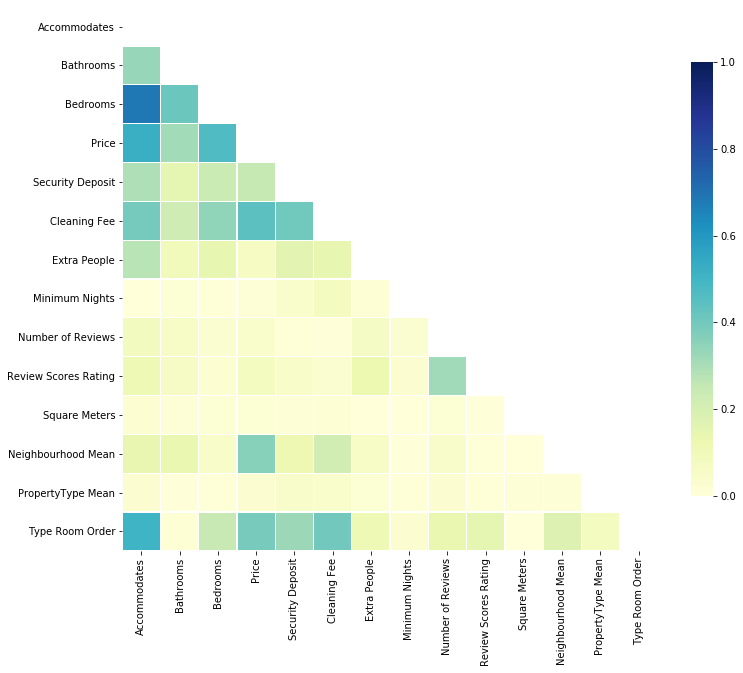

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Observamos que **_Price_** tiene correlación con **_Accommodates_**, **_Bedrooms_**, **_Cleaning Fee_**, **Type Room_** y **_Neighbourhood_**, incluso en un segundo orden con **_Bathrooms_** y **_Security Deposit_**.

Por su parte, es interesante reseñar que **_Square Meters_** no tenga una relación directa con casi ninguna variable, ni siquiera precio. Evidentemente, escapa a la lógica.

En primer lugar, aclaremos la relación entre **_Accommodates_** y **_Bedrooms_**:

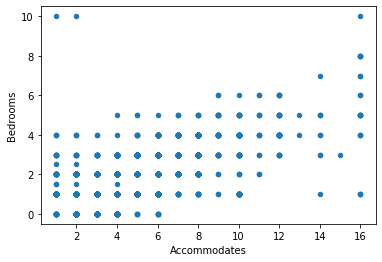

In [142]:
df_train.plot(kind='scatter', x='Accommodates', y='Bedrooms')
plt.show()

Ambas variables están ciertamente correlacionadas, sin embargo, se aprecia que en **_Bedrooms_**, existe posibilidad de gestionar como outliers los valores por encima de seis o siete habitaciones, sin que eso afecte en gran medida a los valores altos de **_Accommodates_**: Desestimamos **_Accomodates_**.

In [143]:
df_train = df_train.drop(['Accommodates'],axis=1)

Analizamos los outliers de las otras variables destacadas:

**_Bedrooms_**

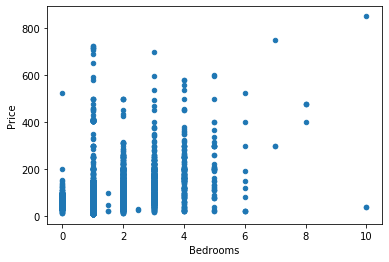

In [144]:
df_train.plot(kind='scatter', x='Bedrooms', y='Price')
plt.show()

Eliminamos los registros por encima de seis habitaciones:

In [145]:
df_train[df_train['Bedrooms'] >= 7].shape

(10, 13)

Solo son 10, tampoco es cuestión de reinventar la rueda...

In [146]:
e = df_train['Bedrooms'].value_counts().ge(6)
df_train = df_train.loc[df_train['Bedrooms'].isin(e[e].index)]

In [147]:
df_train[df_train['Bedrooms'] < 7].shape

(10507, 13)

Nos quedamos con 10507 valores con entre 0 y 6 habitaciones. Y representamos de nuevo para ver cómo ha mejorado:

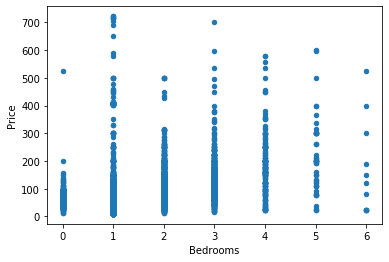

In [148]:
df_train.plot(kind='scatter', x='Bedrooms', y='Price')
plt.show()

**_Cleaning Fee_**

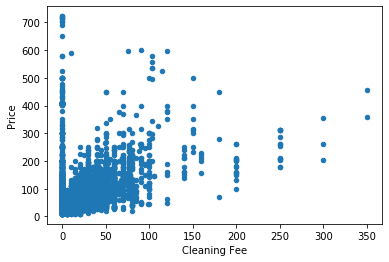

In [149]:
df_train.plot(kind='scatter', x='Cleaning Fee', y='Price')
plt.show()

In [150]:
df_train['Cleaning Fee'].value_counts()

0.0      4238
30.0     1073
20.0      910
10.0      660
25.0      566
         ... 
110.0       1
31.0        1
62.0        1
54.0        1
41.0        1
Name: Cleaning Fee, Length: 84, dtype: int64

In [151]:
df_train[df_train['Cleaning Fee'] > 175].shape

(37, 13)

In [152]:
df_train[df_train['Cleaning Fee'] < 175].shape

(10470, 13)

In [153]:
df_train = df_train[df_train['Cleaning Fee'].le(175)]

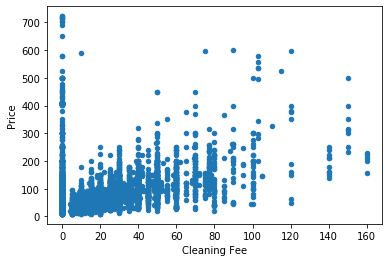

In [154]:
df_train.plot(kind='scatter', x='Cleaning Fee', y='Price')
plt.show()

A modo de reflexión, no tiene mucho sentido que existan alojamientos caros que no cobren 'Cleaning Fee', esto demuestra que podría ser un sesgo provocado por .fillna. A priori no vamos a elimar esos valores hasta que determinemos las variables finales para el modelo.

**_Type Room_**

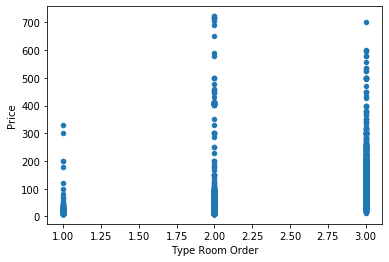

In [155]:
df_train.plot(kind='scatter', x='Type Room Order', y='Price')
plt.show()

Existe cierta coherencia con que las casas (2) concentre más precios altos y que 'Shared room'(1) los precios más bajos.

**_Neighbourhood_**

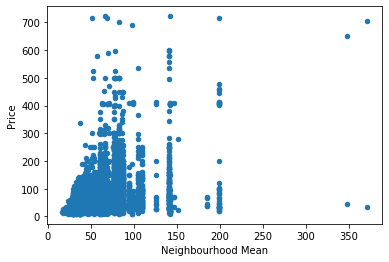

In [156]:
df_train.plot(kind='scatter', x='Neighbourhood Mean', y='Price')
plt.show()

Observamos que existen dos barrios cuya media de precios (para dos registros cada uno) están fuera de logica. Los consideramos outliers.

In [157]:
df_train = df_train[df_train['Neighbourhood Mean'].le(200)]

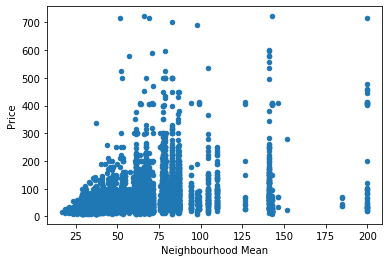

In [158]:
df_train.plot(kind='scatter', x='Neighbourhood Mean', y='Price')
plt.show()

**_Bathrooms_**

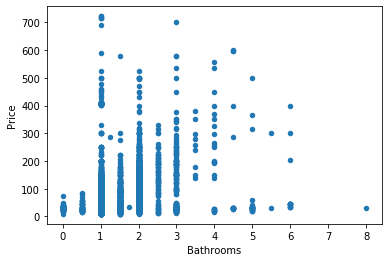

In [159]:
df_train.plot(kind='scatter', x='Bathrooms', y='Price')
plt.show()

In [160]:
df_train = df_train[df_train['Bathrooms'].le(6)]

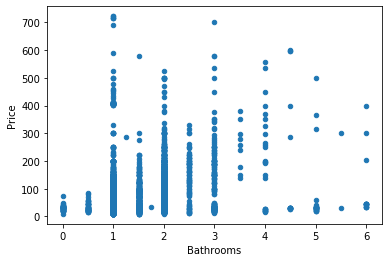

In [161]:
df_train.plot(kind='scatter', x='Bathrooms', y='Price')
plt.show()

**_Security Deposit_**

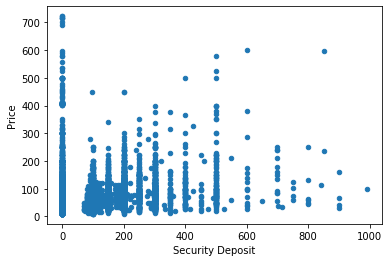

In [162]:
df_train.plot(kind='scatter', x='Security Deposit', y='Price')
plt.show()

In [163]:
df_train = df_train[df_train['Security Deposit'].le(600)]

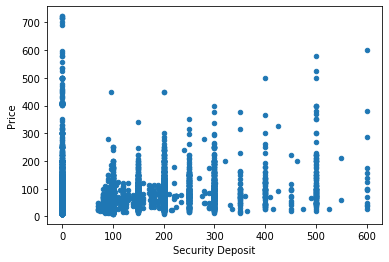

In [164]:
df_train.plot(kind='scatter', x='Security Deposit', y='Price')
plt.show()

Observamos cómo llevamos el dataset:

In [165]:
df_train.shape

(10432, 13)

In [166]:
df_train.corr()

,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters,Neighbourhood Mean,PropertyType Mean,Type Room Order
Bathrooms,1.000000,0.395422,0.285353,0.156302,0.208471,0.103263,0.013952,-0.053385,-0.063289,0.014405,0.127861,0.007483,-0.024770
Bedrooms,0.395422,1.000000,0.452774,0.241039,0.363157,0.158937,0.006130,-0.028204,0.032811,0.020341,0.040396,-0.009091,0.250455
Price,0.285353,0.452774,1.000000,0.246694,0.409630,0.084267,-0.006072,-0.035754,-0.062161,0.019223,0.339401,0.031211,0.399609
Security Deposit,0.156302,0.241039,0.246694,1.000000,0.455524,0.171789,0.020534,0.019104,0.080477,0.007229,0.120021,0.045268,0.336295
Cleaning Fee,0.208471,0.363157,0.409630,0.455524,1.000000,0.200534,0.027917,0.016950,0.088721,0.016568,0.205868,0.052916,0.454369
Extra People,0.103263,0.158937,0.084267,0.171789,0.200534,1.000000,-0.014897,0.068223,0.125761,0.000220,0.067621,0.021189,0.114388
Minimum Nights,0.013952,0.006130,-0.006072,0.020534,0.027917,-0.014897,1.000000,-0.030022,-0.019780,-0.001595,-0.003865,0.007448,0.023368
Number of Reviews,-0.053385,-0.028204,-0.035754,0.019104,0.016950,0.068223,-0.030022,1.000000,0.316250,-0.022722,0.058218,0.028073,0.142274
Review Scores Rating,-0.063289,0.032811,-0.062161,0.080477,0.088721,0.125761,-0.019780,0.316250,1.000000,0.006102,0.000317,0.007927,0.159854
Square Meters,0.014405,0.020341,0.019223,0.007229,0.016568,0.000220,-0.001595,-0.022722,0.006102,1.000000,0.003518,0.013086,-0.001004


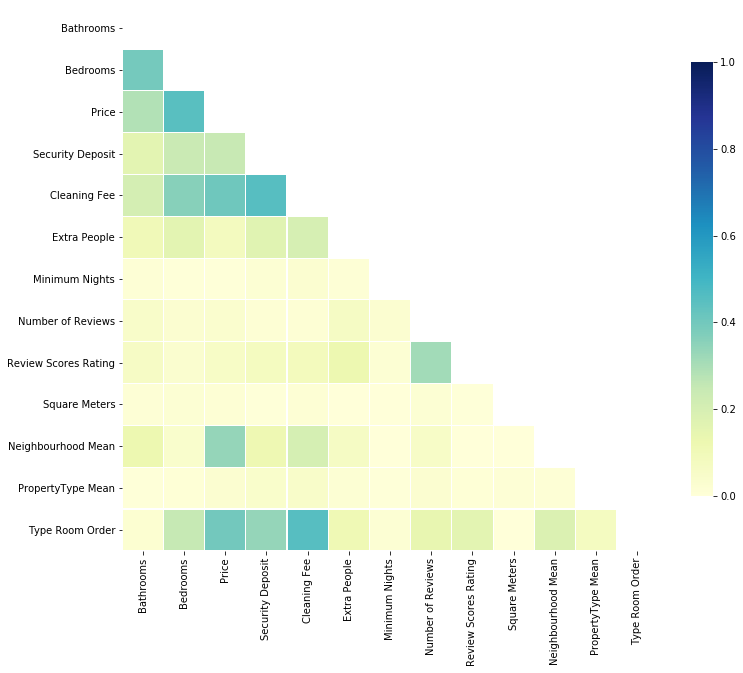

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [168]:
df_train.describe()

,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters,Neighbourhood Mean,PropertyType Mean,Type Room Order
count,10432.000000,10432.000000,10427.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000
mean,1.243146,1.287193,66.384195,76.516296,16.734950,7.423888,2.878930,23.353911,72.161714,32.220508,67.315664,34.891636,2.588574
std,0.564771,0.789246,57.473907,106.882043,20.091751,10.570377,13.013389,38.593602,38.380585,40.696027,21.105741,4.296590,0.516821
min,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,11.984492,1.000000
25%,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,1.000000,1.000000,77.000000,1.999738,54.636986,35.288758,2.000000
50%,1.000000,1.000000,53.000000,0.000000,10.000000,0.000000,2.000000,8.000000,91.000000,18.836488,67.121101,35.288758,3.000000
75%,1.000000,2.000000,80.000000,150.000000,30.000000,15.000000,3.000000,28.000000,97.000000,48.740983,78.665595,35.288758,3.000000
max,6.000000,6.000000,722.000000,600.000000,160.000000,276.000000,1125.000000,446.000000,100.000000,480.030008,199.538462,48.575018,3.000000


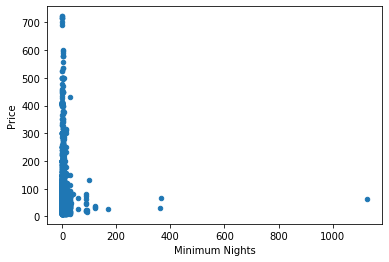

In [169]:
df_train.plot(kind='scatter', x='Minimum Nights', y='Price')
plt.show()

**_Minimum Nights_**, la mayoría no exige un mínimo. La descartamos.

In [170]:
df_train = df_train.drop(['Minimum Nights'],axis=1)

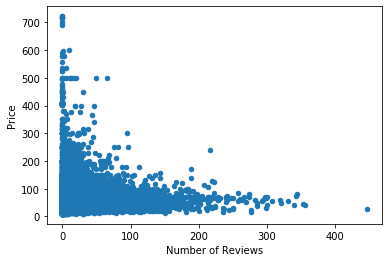

In [171]:
df_train.plot(kind='scatter', x='Number of Reviews', y='Price')
plt.show()

No tiene sentido que con cero _'Reviews'_ el precio esté alto, por lo demás tampoco existe correlación. Seguimos adelgazando el modelo.

In [172]:
df_train = df_train.drop(['Number of Reviews'],axis=1)

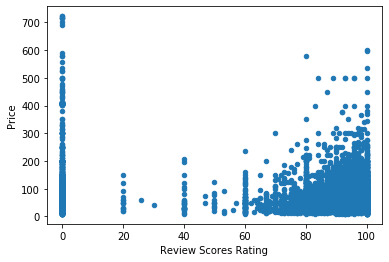

In [173]:
df_train.plot(kind='scatter', x='Review Scores Rating', y='Price')
plt.show()

Salvando la distancia de los valores 0, correspondientes a NA's en muchos casos. Sí existe cierta relación entre los alojamientos más valorados y los precios más bajos. Pero en este caso puede deberse a que también son los más alquilados. Por este motivo estimamos su salida del modelo.

In [174]:
df_train = df_train.drop(['Review Scores Rating'],axis=1)

In [175]:
df_train.corr()

,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Square Meters,Neighbourhood Mean,PropertyType Mean,Type Room Order
Bathrooms,1.000000,0.395422,0.285353,0.156302,0.208471,0.103263,0.014405,0.127861,0.007483,-0.024770
Bedrooms,0.395422,1.000000,0.452774,0.241039,0.363157,0.158937,0.020341,0.040396,-0.009091,0.250455
Price,0.285353,0.452774,1.000000,0.246694,0.409630,0.084267,0.019223,0.339401,0.031211,0.399609
Security Deposit,0.156302,0.241039,0.246694,1.000000,0.455524,0.171789,0.007229,0.120021,0.045268,0.336295
Cleaning Fee,0.208471,0.363157,0.409630,0.455524,1.000000,0.200534,0.016568,0.205868,0.052916,0.454369
Extra People,0.103263,0.158937,0.084267,0.171789,0.200534,1.000000,0.000220,0.067621,0.021189,0.114388
Square Meters,0.014405,0.020341,0.019223,0.007229,0.016568,0.000220,1.000000,0.003518,0.013086,-0.001004
Neighbourhood Mean,0.127861,0.040396,0.339401,0.120021,0.205868,0.067621,0.003518,1.000000,0.013068,0.184537
PropertyType Mean,0.007483,-0.009091,0.031211,0.045268,0.052916,0.021189,0.013086,0.013068,1.000000,0.076847
Type Room Order,-0.024770,0.250455,0.399609,0.336295,0.454369,0.114388,-0.001004,0.184537,0.076847,1.000000


No tiene sentido que Metros Cuadrados y Precio tengan una correlación tan baja.

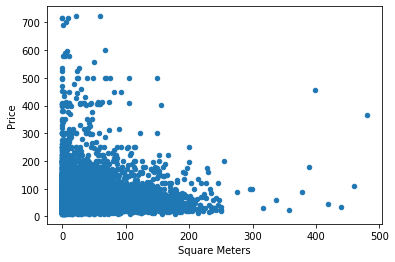

In [176]:
df_train.plot(kind='scatter', x='Square Meters', y='Price')
plt.show()

In [177]:
df_train = df_train[df_train['Square Meters'].le(250)]

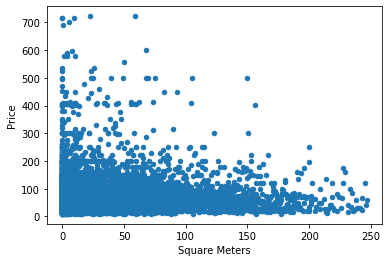

In [178]:
df_train.plot(kind='scatter', x='Square Meters', y='Price')
plt.show()

Tampoco entendemos que haya alojamientos de cero metros. Ikea decora pisos desde 30 metros cuadrados, supongamos que los hay desde 25:

In [179]:
df_train = df_train[df_train['Square Meters'].ge(25)]

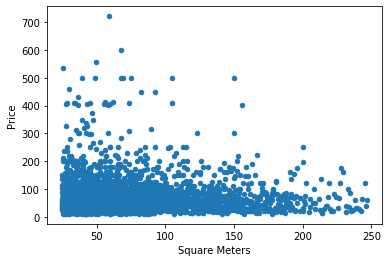

In [180]:
df_train.plot(kind='scatter', x='Square Meters', y='Price')
plt.show()

In [181]:
df_train.corr()

,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Square Meters,Neighbourhood Mean,PropertyType Mean,Type Room Order
Bathrooms,1.000000,0.405514,0.301400,0.154605,0.218279,0.105204,0.022967,0.114355,0.008974,-0.020744
Bedrooms,0.405514,1.000000,0.442290,0.249092,0.368146,0.175244,0.034956,0.011674,0.001882,0.245319
Price,0.301400,0.442290,1.000000,0.250216,0.409393,0.108045,0.017808,0.324059,0.046176,0.407798
Security Deposit,0.154605,0.249092,0.250216,1.000000,0.471848,0.166581,0.016633,0.113505,0.044296,0.341175
Cleaning Fee,0.218279,0.368146,0.409393,0.471848,1.000000,0.216875,-0.001411,0.214108,0.046885,0.448879
Extra People,0.105204,0.175244,0.108045,0.166581,0.216875,1.000000,0.005792,0.071148,0.020938,0.122754
Square Meters,0.022967,0.034956,0.017808,0.016633,-0.001411,0.005792,1.000000,-0.006912,0.020465,-0.009658
Neighbourhood Mean,0.114355,0.011674,0.324059,0.113505,0.214108,0.071148,-0.006912,1.000000,0.017523,0.185946
PropertyType Mean,0.008974,0.001882,0.046176,0.044296,0.046885,0.020938,0.020465,0.017523,1.000000,0.094154
Type Room Order,-0.020744,0.245319,0.407798,0.341175,0.448879,0.122754,-0.009658,0.185946,0.094154,1.000000


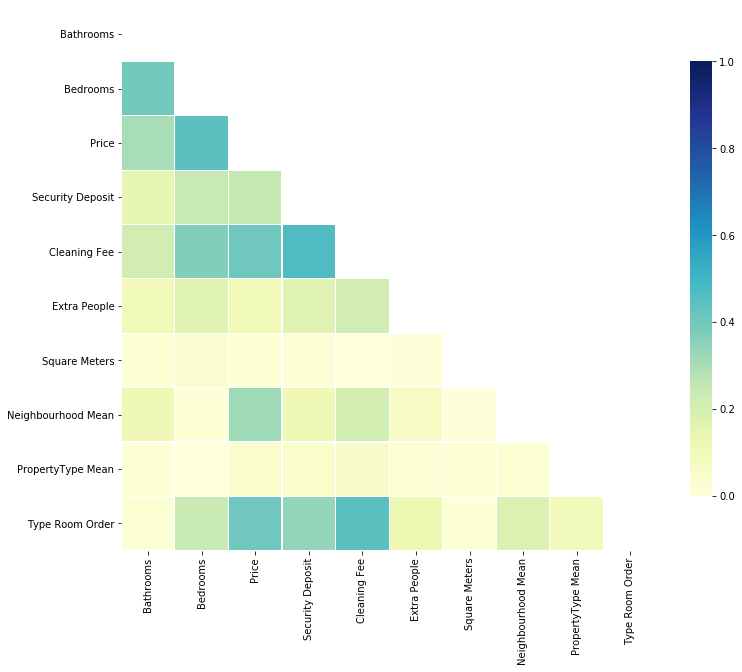

In [182]:
# Compute the correlation matrix
corr = np.abs(df_train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Tampoco es que hayamos mejorado mucho la correlación, pero algo sí hemos mejorado su relación, especialmente con Bedrooms.

In [183]:
np.any(np.isnan(df_train.values))


True

In [184]:
np.all(np.isfinite(df_train.values))

False

In [185]:
df_train.isnull().sum()

Bathrooms             0
Bedrooms              0
Price                 2
Security Deposit      0
Cleaning Fee          0
Extra People          0
Square Meters         0
Neighbourhood Mean    0
PropertyType Mean     0
Type Room Order       0
dtype: int64

In [186]:
df_train['Price'] = df_train['Price'].interpolate()

/Users/jotaemeguzman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
df_train

,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Square Meters,Neighbourhood Mean,PropertyType Mean,Type Room Order
30,1.0,1.0,30.0,90.0,0.0,15,60.015364,63.409091,31.741872,2
31,1.0,2.0,70.0,0.0,0.0,12,60.851491,86.377565,35.288758,3
32,1.0,1.0,25.0,0.0,15.0,5,61.687619,60.983651,35.288758,2
33,1.0,0.0,54.0,100.0,30.0,0,62.523746,77.609813,48.575018,3
34,2.0,1.0,31.0,0.0,0.0,0,63.359873,53.500000,35.288758,2
...,...,...,...,...,...,...,...,...,...,...
11750,1.0,1.0,20.0,0.0,0.0,15,54.998600,41.000000,35.288758,2
11751,1.0,1.0,50.0,300.0,30.0,0,48.887644,70.597701,35.288758,3
11752,1.0,1.0,29.0,250.0,25.0,0,42.776689,60.983651,35.288758,3
11753,1.0,1.0,69.0,0.0,0.0,0,36.665733,60.983651,11.984492,3


In [188]:
first_column = df_train.pop('Price')
df_train.insert(0, 'Price', first_column)
df_train

,Price,Bathrooms,Bedrooms,Security Deposit,Cleaning Fee,Extra People,Square Meters,Neighbourhood Mean,PropertyType Mean,Type Room Order
30,30.0,1.0,1.0,90.0,0.0,15,60.015364,63.409091,31.741872,2
31,70.0,1.0,2.0,0.0,0.0,12,60.851491,86.377565,35.288758,3
32,25.0,1.0,1.0,0.0,15.0,5,61.687619,60.983651,35.288758,2
33,54.0,1.0,0.0,100.0,30.0,0,62.523746,77.609813,48.575018,3
34,31.0,2.0,1.0,0.0,0.0,0,63.359873,53.500000,35.288758,2
...,...,...,...,...,...,...,...,...,...,...
11750,20.0,1.0,1.0,0.0,0.0,15,54.998600,41.000000,35.288758,2
11751,50.0,1.0,1.0,300.0,30.0,0,48.887644,70.597701,35.288758,3
11752,29.0,1.0,1.0,250.0,25.0,0,42.776689,60.983651,35.288758,3
11753,69.0,1.0,1.0,0.0,0.0,0,36.665733,60.983651,11.984492,3


In [189]:
features = df_train.columns.drop(['Price'])
X_train = df_train[features].values
y_train = df_train['Price'].values
X_train.shape

(4498, 9)

In [190]:
y_train.shape

(4498,)

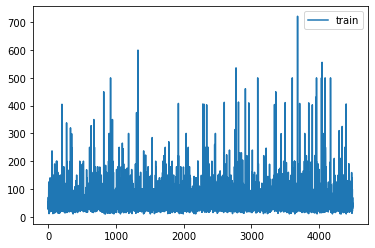

In [191]:
plt.plot(range(0,len(y_train)),y_train, label='train')
#plt.plot(range(len(y_train),len(y)),y_test,label='test')
plt.legend()
plt.show()

In [192]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import Lasso

tscv = TimeSeriesSplit(n_splits=3)

alpha_vector = np.logspace(-4,4,20)
param_grid = {'alpha': alpha_vector}

grid = GridSearchCV(Lasso(), param_grid=param_grid, cv = tscv.split(X_train)).fit(X_train, y_train)

best mean cross-validation score: 0.373
best parameters: {'alpha': 0.615848211066026}


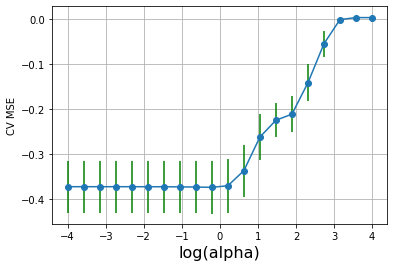

In [193]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(alpha_vector),-1*scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(alpha)',fontsize=16)
plt.ylabel('CV MSE')
plt.grid()
plt.show()

In [194]:
df_t = pd.read_csv('./test.csv', sep=';', decimal='.')

In [195]:
df_t.shape

(2956, 89)

In [196]:
df_t = df_t.drop(['ID','Listing Url','Scrape ID','Last Scraped','Name','Summary','Space','Description','Experiences Offered','Neighborhood Overview','Transit','Access','Thumbnail Url','Medium Url','House Rules','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Since','Host Location','Host About','Host Response Time','Host Thumbnail Url','Host Picture Url','Host Verifications','Street','Neighbourhood','Neighbourhood Group Cleansed','State','Zipcode','Country Code','Country','Weekly Price','Monthly Price','Maximum Nights','Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90','Availability 365','First Review','Last Review','License','Jurisdiction Names'],axis=1)
df_t = df_t.drop(['Calculated host listings count','Host Total Listings Count'],axis=1)
df_t = df_t.drop(['Host Response Rate','Latitude','Longitude','Geolocation'],axis=1)
df_t = df_t.drop(['Beds'],axis=1)
df_t = df_t.drop(['Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value'],axis=1)
df_t = df_t.drop(['Reviews per Month','Guests Included'],axis=1)
df_t = df_t.drop(['Calendar last Scraped','Cancellation Policy','Features'],axis=1)
df_t['Square Meters'] = df_t['Square Feet'].apply(lambda x: x * 0.3048 * 0.3048)
df_t = df_t.drop(['Square Feet'],axis=1)
df_t = df_t.drop(['Notes','Interaction'],axis=1)
df_t = df_t.drop(['Host Neighbourhood'],axis=1)
df_t = df_t.drop(['City','Smart Location'],axis=1)
df_t[df_t['Neighbourhood Cleansed'].str.contains('Cortes')] = df_t[df_t['Neighbourhood Cleansed'].str.contains('Cortes')].fillna('Madrid')
df_t[df_t['Neighbourhood Cleansed'].str.contains('Universidad')] = df_t[df_t['Neighbourhood Cleansed'].str.contains('Universidad')].fillna('Madrid')
df_t[df_t['Neighbourhood Cleansed'].str.contains('Hispanoamérica')] = df_t[df_t['Neighbourhood Cleansed'].str.contains('Hispanoamérica')].fillna('Madrid')
df_t[df_t['Neighbourhood Cleansed'].str.contains('San Diego')] = df_t[df_t['Neighbourhood Cleansed'].str.contains('San Diego')].fillna('Madrid')

In [197]:
df_t[df_t['Neighbourhood Cleansed'].str.contains('Little Italy')]

,Host Acceptance Rate,Host Listings Count,Neighbourhood Cleansed,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters


In [198]:
df_t[df_t['Neighbourhood Cleansed'].str.contains('Haringey')]

,Host Acceptance Rate,Host Listings Count,Neighbourhood Cleansed,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters


In [199]:
df_t[df_t['Neighbourhood Cleansed'].str.contains('Commune de Genève')]

,Host Acceptance Rate,Host Listings Count,Neighbourhood Cleansed,Market,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters


In [200]:
df_t['Market'] = df_t['Market'].fillna('Madrid')
df_t = df_t.drop(['Market'],axis=1)
df_t = df_t.drop(['Amenities'],axis=1)
df_t = df_t.drop(['Bed Type'],axis=1)

s = df_t['Property Type'].value_counts().gt(50)
df_t = df_t.loc[df_t['Property Type'].isin(s[s].index)]

df_t = df_t.drop(['Host Acceptance Rate'],axis=1)
df_t = df_t.drop(['Host Listings Count'],axis=1)

t = df_t['Bathrooms'].value_counts().eq(6)
df_t = df_t.loc[~df_t['Bathrooms'].isin(t[t].index)]

df_t.loc[df_t['Bedrooms'] == 'Madrid']

,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters
264,Universidad,Apartment,Entire home/apt,2,1.0,Madrid,40.0,Madrid,Madrid,0,5,26,83,30.0077


In [201]:
df_t = df_t.drop(264, axis=0)


In [202]:
df_t.loc[df_t['Price'] == 'Madrid']

/Users/jotaemeguzman/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Price,Security Deposit,Cleaning Fee,Extra People,Minimum Nights,Number of Reviews,Review Scores Rating,Square Meters


In [203]:
df_t['Security Deposit'] = df_t['Security Deposit'].replace('Madrid', np.nan)
df_t['Cleaning Fee'] = df_t['Cleaning Fee'].replace('Madrid', np.nan)
df_t['Review Scores Rating'] = df_t['Review Scores Rating'].replace('Madrid', np.nan)
df_t['Square Meters'] = df_t['Square Meters'].replace('Madrid', np.nan)

In [204]:
df_t['Bathrooms'] = pd.to_numeric(df_t['Bathrooms'])
df_t['Bedrooms'] = pd.to_numeric(df_t['Bedrooms'])
df_t['Price'] = pd.to_numeric(df_t['Price'])
df_t['Security Deposit'] = pd.to_numeric(df_t['Security Deposit'])
df_t['Cleaning Fee'] = pd.to_numeric(df_t['Cleaning Fee'])
df_t['Review Scores Rating'] = pd.to_numeric(df_t['Review Scores Rating'])
df_t['Square Meters'] = pd.to_numeric(df_t['Square Meters'])

In [205]:
test_mean_Neighbourhood = df_t.groupby('Neighbourhood Cleansed')['Price'].mean()
df_t.loc[:, 'Neighbourhood Mean'] = df_t['Neighbourhood Cleansed'].map(test_mean_Neighbourhood)

In [206]:
test_mean_Property = df_t.groupby('Property Type')['Square Meters'].mean()
df_t.loc[:, 'PropertyType Mean'] = df_t['Property Type'].map(test_mean_Property)

In [207]:
typeRoom_dict = {'Shared room':1,'Private room':2,'Entire home/apt':3}
df_t['Type Room Order'] = df_t['Room Type'].map(typeRoom_dict)

In [208]:
df_t['Review Scores Rating'] = df_t['Review Scores Rating'].fillna(0)
df_t['Cleaning Fee'] = df_t['Cleaning Fee'].fillna(0)
df_t['Security Deposit'] = df_t['Security Deposit'].fillna(0)
df_t['Square Meters'] = df_t['Square Meters'].interpolate()
df_t['Bedrooms'] = df_t['Bedrooms'].interpolate()
df_t['Bathrooms'] = df_t['Bathrooms'].interpolate()
df_t['Square Meters'] = df_t['Square Meters'].fillna(0)
df_test = df_t.drop(['Neighbourhood Cleansed','Property Type','Room Type'],axis=1)
df_test = df_test.drop(['Accommodates'],axis=1)

e = df_test['Bedrooms'].value_counts().ge(6)
df_test = df_test.loc[df_test['Bedrooms'].isin(e[e].index)]

df_test = df_test[df_test['Cleaning Fee'].le(175)]
df_test = df_test[df_test['Neighbourhood Mean'].le(200)]
df_test = df_test[df_test['Bathrooms'].le(6)]
df_test = df_test[df_test['Security Deposit'].le(600)]
df_test = df_test.drop(['Minimum Nights'],axis=1)
df_test = df_test.drop(['Number of Reviews'],axis=1)
df_test = df_test.drop(['Review Scores Rating'],axis=1)
df_test = df_test[df_test['Square Meters'].le(250)]
df_test = df_test[df_test['Square Meters'].ge(25)]
df_test['Price'] = df_test['Price'].interpolate()

In [209]:
first_column = df_test.pop('Price')
df_test.insert(0, 'Price', first_column)
df_test

,Price,Bathrooms,Bedrooms,Security Deposit,Cleaning Fee,Extra People,Square Meters,Neighbourhood Mean,PropertyType Mean,Type Room Order
13,154.0,3.0,4.0,200.0,0.0,0,212.004737,167.750000,42.211160,3
14,65.0,1.0,1.0,100.0,25.0,20,204.784107,58.403900,30.450169,3
17,30.0,1.0,1.0,0.0,0.0,0,197.563476,33.272727,30.450169,2
18,60.0,1.0,1.0,500.0,20.0,10,190.342845,81.830097,30.450169,3
19,44.0,2.0,1.0,93.0,0.0,12,183.122214,34.000000,30.450169,3
...,...,...,...,...,...,...,...,...,...,...
2916,190.0,3.0,4.0,0.0,0.0,15,29.976714,153.666667,42.211160,3
2917,38.0,2.0,1.0,200.0,10.0,20,28.977490,83.817259,30.450169,2
2918,22.0,1.0,1.0,0.0,0.0,22,27.978267,83.817259,3.994831,1
2920,35.0,1.0,1.0,0.0,0.0,10,26.979043,81.830097,30.450169,2


In [210]:
features_test = df_test.columns.drop(['Price'])
X_test = df_test[features_test].values
y_test = df_test['Price'].values
X_test.shape

(1115, 9)

In [211]:
y_test.shape

(1115,)

In [212]:
y = df_test['Price'].values

In [213]:
y.shape

(1115,)

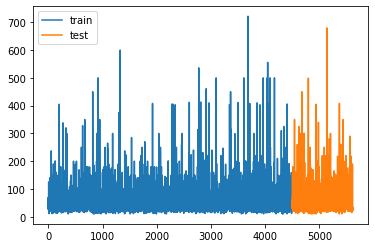

In [214]:
plt.plot(range(0,len(y_train)),y_train, label='train')
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test,label='test')
plt.legend()
plt.show()

In [215]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)
print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))


w = lasso.coef_
for f,wi in zip(features,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.83e+03
MSE Modelo Lasso (test) : 1.82e+03
RMSE Modelo Lasso (train): 42.8
RMSE Modelo Lasso (test) : 42.6
Bathrooms 11.688116343598116
Bedrooms 19.202944873366093
Security Deposit 0.0010370297280066327
Cleaning Fee 0.37067684652189176
Extra People -0.19530470644318496
Square Meters 0.013034442972295609
Neighbourhood Mean 0.6276847414951122
PropertyType Mean 0.14617599855632016
Type Room Order 22.86514399895683


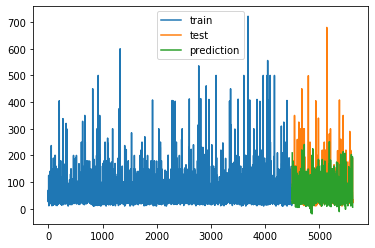

In [216]:
plt.plot(range(0,len(y_train)),y_train, label='train')
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test,label='test')
plt.plot(range(len(y_train),len(y_train)+len(y_test)),ytestLasso,label='prediction')
plt.legend()
plt.show()

Tienen lógica que las variables más importantes en relación _Price_ sean: **_Type Room_** _(Alojamiento completo / Habitación Privada / Habitación Compartida)_ ; **_Bedrooms_**, que recordemos se correlaba con _Accommodates_; y **_Bathrooms_**, que por lógica también se correla con número de habitaciones.

In [217]:
from sklearn import preprocessing

df_tr = df_train.drop(['Price'], axis=1)
df_tr.columns = ['Bathrooms','Bedrooms','Deposit','Cleaning','Extra','Meters','Neighbourhood','PropertyType','Room']

data2 = df_train.values

y_train2 = data2[:,0:1]    
X_train2 = data2[:,1:]      
feature_names = df_tr.columns[0:]

scaler2 = preprocessing.StandardScaler().fit(X_train2)
XtrainScaled2 = scaler2.transform(X_train2)

In [218]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import Lasso

alpha_vector2 = np.logspace(-1,2,20)
param_grid2= {'alpha': alpha_vector2 }
grid2 = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid2, cv = 10)
print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))

#-1 porque es negado
scores = -1*np.array(grid2.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector2,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [ ]:
from sklearn.metrics import mean_squared_error


alpha_optimo2 = grid2.best_params_['alpha']
lasso2 = Lasso(alpha = alpha_optimo2).fit(XtrainScaled2,y_train2)

ytrainLasso2 = lasso.predict(XtrainScaled2)
ytestLasso2  = lasso.predict(XtestScaled2)
mseTrainModelLasso2 = mean_squared_error(y_train2,ytrainLasso2)
mseTestModelLasso2 = mean_squared_error(y_test2,ytestLasso2)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso2)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso2)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso2))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso2))

w = lasso.coef_
for f,wi in zip(feature_names,w):
       print(f,wi)